# Recuperando alguns trechos do módulo anterior para prosseguir

In [1]:
import pandas as pd
import numpy as np

dados = pd.read_excel("Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")
dados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [2]:
def preenche_tabela(dados):
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[features_continuas_colunas].fillna(method='bfill').fillna(method='ffill')
    features_categoricas = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True,axis=1)
    dados_finais.columns = dados.columns
    return dados_finais

In [3]:
dados_limpos = preenche_tabela(dados)

a_remover = dados_limpos.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query("PATIENT_VISIT_IDENTIFIER not in @a_remover")
dados_limpos = dados_limpos.dropna()

dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1760.000000,1760.000000,1760.000000,1760.00000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,...,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,192.818182,0.457386,0.380682,0.11250,0.026136,0.101705,0.021591,0.132955,0.049432,0.212500,...,-0.778209,-0.823458,-0.915593,-0.828593,-0.774857,-0.854690,-0.788155,-0.824412,-0.915552,0.201705
std,110.637724,0.498322,0.485692,0.31607,0.159586,0.302345,0.145385,0.339622,0.216829,0.409193,...,0.411909,0.276279,0.247695,0.287696,0.368311,0.240338,0.384405,0.274953,0.248093,0.401387
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,97.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,191.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,289.250000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.764706,-0.738095,-0.919192,-0.726087,-0.651942,-0.771625,-0.756272,-0.736640,-0.920103,0.000000
max,384.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,0.329660,1.000000,1.000000


In [4]:
def prepare_window(rows):
    if(np.any(rows["ICU"])):
        rows.loc[rows["WINDOW"]=="0-2", "ICU"] = 1
    return rows.loc[rows["WINDOW"] == "0-2"]

dados_limpos = dados_limpos.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare_window)
dados_limpos.AGE_PERCENTIL = dados_limpos.AGE_PERCENTIL.astype("category").cat.codes
dados_limpos.head()

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
5,25,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0-2,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

np.random.seed(73246)


x_columns = dados.columns
y = dados_limpos["ICU"]
x = dados_limpos[x_columns].drop(["ICU","WINDOW"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
modelo = DummyClassifier()
modelo.fit(x_train, y_train)

y_prediction = modelo.predict(x_test)
accuracy_score(y_test, y_prediction)

0.5340909090909091

In [6]:
modelo = LogisticRegression(max_iter=10000)
modelo.fit(x_train, y_train)

y_prediction = modelo.predict(x_test)
accuracy_score(y_test, y_prediction)

0.6818181818181818

In [7]:
# ver se alguma coluna ficou de fora da seleção x_columns
for coluna in dados.columns:
    if coluna not in x_columns:
        print(coluna)

---

### Resposta desafio 1:

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit_transform(dados_limpos.AGE_PERCENTIL)

array([5, 0, 3, 0, 0, 6, 1, 4, 7, 7, 7, 1, 4, 5, 4, 2, 1, 6, 3, 6, 5, 3,
       7, 8, 1, 3, 6, 7, 8, 2, 6, 2, 2, 6, 6, 2, 2, 1, 4, 3, 3, 4, 6, 8,
       9, 0, 9, 8, 4, 4, 7, 6, 0, 1, 2, 3, 6, 1, 2, 8, 8, 7, 7, 2, 1, 9,
       6, 5, 2, 7, 0, 4, 1, 6, 9, 6, 2, 2, 9, 0, 1, 1, 0, 0, 5, 8, 7, 1,
       2, 5, 7, 9, 4, 9, 6, 9, 3, 0, 5, 3, 9, 1, 0, 9, 1, 1, 7, 0, 6, 5,
       2, 6, 8, 7, 2, 1, 5, 1, 7, 4, 6, 1, 7, 7, 9, 2, 7, 5, 7, 2, 9, 3,
       0, 8, 9, 9, 9, 5, 4, 3, 5, 8, 9, 3, 5, 4, 9, 2, 6, 6, 2, 4, 1, 4,
       0, 5, 1, 5, 0, 2, 2, 0, 4, 5, 8, 4, 0, 2, 4, 2, 1, 6, 2, 2, 5, 1,
       6, 8, 7, 4, 1, 0, 0, 1, 1, 9, 2, 5, 2, 1, 3, 0, 4, 0, 4, 5, 9, 0,
       9, 8, 9, 9, 0, 7, 9, 5, 1, 7, 1, 0, 3, 0, 5, 9, 2, 2, 3, 0, 3, 7,
       4, 9, 5, 8, 3, 3, 4, 7, 5, 2, 9, 0, 6, 7, 3, 7, 1, 1, 3, 1, 9, 5,
       2, 4, 9, 1, 1, 2, 5, 1, 6, 7, 4, 0, 6, 4, 1, 8, 0, 1, 8, 0, 8, 2,
       4, 6, 7, 3, 8, 2, 4, 3, 0, 2, 4, 3, 4, 3, 7, 6, 6, 7, 3, 8, 5, 1,
       5, 3, 8, 3, 4, 5, 9, 5, 2, 3, 0, 6, 8, 7, 0,

---

# Métricas

In [9]:
from sklearn.tree import DecisionTreeClassifier

modelo_arvore = DecisionTreeClassifier()
modelo_arvore.fit(x_train, y_train)
predicao_arvore = modelo_arvore.predict(x_test)
accuracy_score(y_test, predicao_arvore)

0.6477272727272727

### Matriz de confusão

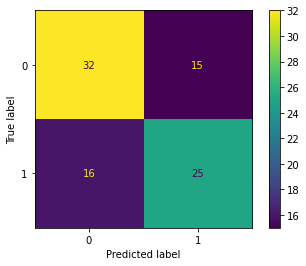

In [10]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(modelo_arvore, x_test, y_test)

In [1]:
verdadeiro_positivo = 25
falso_positivo = 15
verdadeiro_negativo = 32
falso_negativo = 16

## Precisão, recall e f1 score

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicao_arvore))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67        47
           1       0.62      0.61      0.62        41

    accuracy                           0.65        88
   macro avg       0.65      0.65      0.65        88
weighted avg       0.65      0.65      0.65        88



# Explicação:
## * precisão = de quantas previsões que eu disse que eram positivas estão certas
## * recall = de todas as positivas, quantas eu acertei
## * f1 = média harmônica entre recall e precision

In [13]:
# Cálculo da precisão do positivo
verdadeiro_positivo / (verdadeiro_positivo + falso_positivo)

0.625

In [14]:
# Cálculo da precisão do negativo
verdadeiro_negativo / (verdadeiro_negativo + falso_negativo)

0.6666666666666666

In [15]:
# cálculo do recall do positivo
verdadeiro_positivo / (verdadeiro_positivo + falso_negativo) # o falso negativo é positivo que errei

0.6097560975609756

In [16]:
# cálculo do recall do negativo
verdadeiro_negativo / (verdadeiro_negativo + falso_positivo) # o falso positivo é o negativo que errei

0.6808510638297872

In [17]:
#f1 é uma média harmônica entre recall e precision
p = 0.67
r = 0.68
f1 = 2 * ( p * r ) / ( p + r )
f1

0.674962962962963

---

## Curva ROC e AUC

In [18]:
from sklearn.metrics import roc_auc_score

prob_arvore = modelo_arvore.predict_proba(x_test)
roc_auc_score(y_test, prob_arvore[:,1])

0.6453035806953815

# Desafio
## Fazer uma curva ROC

In [19]:
from sklearn.metrics import roc_curve, auc

prob_arvore = modelo_arvore.predict_proba(x_test)

fpr, tpr, limite = roc_curve(y_test, prob_arvore[:,1])

roc_auc = auc(fpr, tpr)

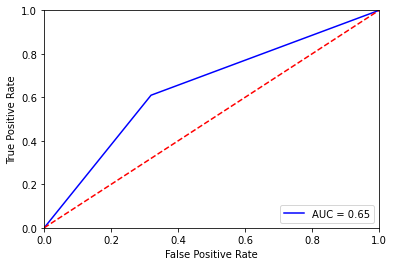

In [20]:
import matplotlib.pyplot as plt
#plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

---

In [21]:
def roda_modelo(modelo, dados):
    
    x_columns = dados.columns
    y = dados['ICU']
    x = dados[x_columns].drop(["PATIENT_VISIT_IDENTIFIER", 'ICU', 'WINDOW'], axis=1)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
    modelo.fit(x_train, y_train)
    predicao = modelo.predict(x_test)
    prob_predict = modelo.predict_proba(x_test)
    
    auc = roc_auc_score(y_test, prob_predict[:,1])
    
    print(f"AUC: {auc}")
    print('\nClassification Report:')
    print(classification_report(y_test, predicao))

In [22]:
roda_modelo(modelo, dados_limpos)

AUC: 0.8412039439543332

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        47
           1       0.83      0.71      0.76        41

    accuracy                           0.80        88
   macro avg       0.80      0.79      0.79        88
weighted avg       0.80      0.80      0.79        88



In [23]:
roda_modelo(modelo_arvore, dados_limpos)

AUC: 0.608718214841723

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65        47
           1       0.59      0.54      0.56        41

    accuracy                           0.61        88
   macro avg       0.61      0.61      0.61        88
weighted avg       0.61      0.61      0.61        88



In [24]:
roda_modelo(modelo_arvore, dados_limpos)

AUC: 0.6696938245978206

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        47
           1       0.64      0.66      0.65        41

    accuracy                           0.67        88
   macro avg       0.67      0.67      0.67        88
weighted avg       0.67      0.67      0.67        88



## Podemos perceber que há diferença nos resultados por conta do seed de aleatoriedade

---

# Como analisar os efeitos da alietoriedade

In [25]:
def roda_n_modelos(modelo, dados, n):
    
    x_columns = dados.columns
    y = dados['ICU']
    x = dados[x_columns].drop(["PATIENT_VISIT_IDENTIFIER", 'ICU', 'WINDOW'], axis=1)
    
    
    auc_lista = []
    for _ in range(n):
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
        modelo.fit(x_train, y_train)
        prob_predict = modelo.predict_proba(x_test)

        auc = roc_auc_score(y_test, prob_predict[:,1])
        auc_lista.append(auc)
    
    auc_medio = np.mean(auc_lista)
    auc_std = np.std(auc_lista)
    print(f"AUC médio: {auc_medio}")
    print(f"Intervalo de confiança: de {auc_medio - 2 * auc_std} a {auc_medio + 2 * auc_std}")

In [26]:
roda_n_modelos(modelo, dados_limpos, 100)

AUC médio: 0.7669174883238195
Intervalo de confiança: de 0.6798579487950835 a 0.8539770278525554


In [27]:
roda_n_modelos(modelo_arvore, dados_limpos, 100)

AUC médio: 0.6286170212765958
Intervalo de confiança: de 0.5281024953020585 a 0.729131547251133


In [28]:
roda_n_modelos(modelo_arvore, dados_limpos, 100)

AUC médio: 0.6328982874935134
Intervalo de confiança: de 0.5356984043556567 a 0.7300981706313701


---

## Validação cruzada

In [29]:
from sklearn.model_selection import cross_validate

cross_validate(modelo, x, y, cv=5)

{'fit_time': array([0.44498014, 0.18299842, 0.4350493 , 0.4671371 , 0.40222049]),
 'score_time': array([0.00299335, 0.00299859, 0.00300145, 0.00600266, 0.00299954]),
 'test_score': array([0.70422535, 0.76056338, 0.77142857, 0.72857143, 0.71428571])}

# o valor de cv deve(boa prática) ser entre 5 e 10 (conforme documentação)

In [30]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True) # faz o embaralhamento dos dados para melhorar o desempenho do cross validate
cross_validate(modelo, x, y, cv=cv)

{'fit_time': array([0.45407963, 0.41999817, 0.37200284, 0.15897489, 0.40202665]),
 'score_time': array([0.00400186, 0.00299883, 0.00554729, 0.00300026, 0.00297308]),
 'test_score': array([0.71830986, 0.85915493, 0.64285714, 0.67142857, 0.58571429])}

In [31]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10) # 10 vezes fará a divisão de 5 splits para a validação cruzada
cross_validate(modelo, x, y, cv=cv)

{'fit_time': array([0.44020987, 0.1600008 , 0.43100238, 0.41602492, 0.19494271,
        0.43600202, 0.38400292, 0.41003132, 0.19596505, 0.37349439,
        0.39251041, 0.38397121, 0.14699721, 0.32705951, 0.40156364,
        0.18748736, 0.15000534, 0.41503811, 0.14199352, 0.17100263,
        0.41699815, 0.39099717, 0.16803145, 0.345999  , 0.15200257,
        0.17396927, 0.41799617, 0.41105008, 0.19800138, 0.38500047,
        0.39900255, 0.13599825, 0.4070065 , 0.35399866, 0.43301916,
        0.36069441, 0.10799694, 0.41402292, 0.12696028, 0.40699077,
        0.8050468 , 0.76804447, 0.26407814, 0.28502202, 0.22899938,
        0.79598022, 0.2920022 , 0.69104505, 0.21899986, 0.47999763]),
 'score_time': array([0.00299954, 0.00199938, 0.00299668, 0.00500298, 0.00500584,
        0.00299978, 0.00299501, 0.00497437, 0.00500607, 0.00400162,
        0.00402784, 0.00399995, 0.00400472, 0.00199914, 0.00299788,
        0.00499964, 0.00199795, 0.00500631, 0.00499988, 0.00399828,
        0.00299859, 

# Fazendo a estratificação com o cross validation, para melhorar o desempenho do modelo criando uma variabilidade dos dados de treino e teste

In [32]:
def roda_modelo_cv(modelo, dados, n_splits, n_repeats):
    
    np.random.seed(1231234)
    dados = dados.sample(frac=1).reset_index(drop=True)
    
    x_columns = dados.columns
    y = dados['ICU']
    x = dados[x_columns].drop(["PATIENT_VISIT_IDENTIFIER", 'ICU', 'WINDOW'], axis=1)
    
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats) 
    resultados = cross_validate(modelo, x, y, cv=cv, scoring='roc_auc')
    
    auc_medio = np.mean(resultados['test_score'])
    auc_std = np.std(resultados['test_score'])
    
    
    print(f"AUC médio: {auc_medio}")
    print(f"Intervalo de confiança: de {auc_medio - 2 * auc_std} a {auc_medio + 2 * auc_std}")

In [33]:
roda_modelo_cv(modelo, dados_limpos, 5, 10)

AUC médio: 0.7617903788956422
Intervalo de confiança: de 0.6406775403577765 a 0.8829032174335079


In [34]:
roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)

AUC médio: 0.6230424263976896
Intervalo de confiança: de 0.492649121879285 a 0.7534357309160942


In [35]:
from sklearn.tree import DecisionTreeClassifier

modelo_arvore = DecisionTreeClassifier(max_depth=3)
roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)

AUC médio: 0.6670562308720203
Intervalo de confiança: de 0.541053924796792 a 0.7930585369472485


In [36]:
modelo_arvore = DecisionTreeClassifier(max_depth=4)
roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)

AUC médio: 0.6667016627871891
Intervalo de confiança: de 0.5279922656564118 a 0.8054110599179665


In [37]:
modelo_arvore = DecisionTreeClassifier(max_depth=6)
roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)

AUC médio: 0.6358412202573386
Intervalo de confiança: de 0.4772658124315947 a 0.7944166280830824


# Conforme aumenta muito as divisões, o modelo ficou ruim

## Vamos observar como se dá essa evolução

In [38]:
def roda_modelo_cv_ptteste(modelo, dados, n_splits, n_repeats):
    
    np.random.seed(1231234)
    dados = dados.sample(frac=1).reset_index(drop=True)
    
    x_columns = dados.columns
    y = dados['ICU']
    x = dados[x_columns].drop(["PATIENT_VISIT_IDENTIFIER", 'ICU', 'WINDOW'], axis=1)
    
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats) 
    resultados = cross_validate(modelo, x, y, cv=cv, scoring='roc_auc', return_train_score=True)
    
    auc_medio = np.mean(resultados['test_score'])
    auc_medio_treino = np.mean(resultados['train_score'])
    
    print(f"AUC médio modelo: {auc_medio} - AUC médio treino: {auc_medio_treino}")
    
    return auc_medio, auc_medio_treino

In [39]:
teste_lista = []
treino_lista = []

for i in range(9):
    modelo_arvore = DecisionTreeClassifier(max_depth=(i+1))
    teste, treino = roda_modelo_cv_ptteste(modelo_arvore, dados_limpos, 5, 10)
    
    teste_lista.append(teste)
    treino_lista.append(treino)

AUC médio modelo: 0.5755830262080263 - AUC médio treino: 0.6445982993536308
AUC médio modelo: 0.6592961307599465 - AUC médio treino: 0.7538441023846748
AUC médio modelo: 0.6670562308720203 - AUC médio treino: 0.8244703698310262
AUC médio modelo: 0.6667016627871891 - AUC médio treino: 0.8834409148342366
AUC médio modelo: 0.6477491149941809 - AUC médio treino: 0.9277862898076039
AUC médio modelo: 0.6358412202573386 - AUC médio treino: 0.9572516122134539
AUC médio modelo: 0.6108247594185093 - AUC médio treino: 0.9746376804501192
AUC médio modelo: 0.590497024386827 - AUC médio treino: 0.9853964890244532
AUC médio modelo: 0.5847110530087503 - AUC médio treino: 0.9917389676318032


# Podemos observar o OVERFIT dos dados de treino

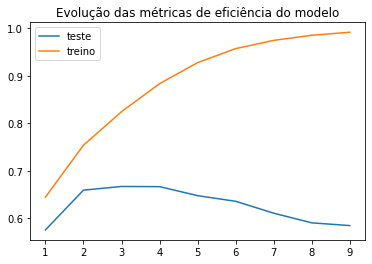

In [40]:
x = range(1, 10)
plt.plot(x, teste_lista)
plt.plot(x, treino_lista)
plt.title("Evolução das métricas de eficiência do modelo")
plt.legend(['teste', 'treino'])
plt.show()

---

In [41]:
from sklearn.ensemble import RandomForestClassifier

teste_lista = []
treino_lista = []

for i in range(9):
    modelo_arvore = RandomForestClassifier(max_depth=(i+1))
    teste, treino = roda_modelo_cv_ptteste(modelo_arvore, dados_limpos, 5, 10)
    
    teste_lista.append(teste)
    treino_lista.append(treino)

AUC médio modelo: 0.778870566888659 - AUC médio treino: 0.8541612333697712
AUC médio modelo: 0.7882617381137118 - AUC médio treino: 0.8970983223278708
AUC médio modelo: 0.7919978905340749 - AUC médio treino: 0.939230523370584
AUC médio modelo: 0.798515426311479 - AUC médio treino: 0.9709094588271941
AUC médio modelo: 0.7985849066770119 - AUC médio treino: 0.9876904648921889
AUC médio modelo: 0.7963251918186129 - AUC médio treino: 0.9959304134319379
AUC médio modelo: 0.7943957713694556 - AUC médio treino: 0.9991518349612467
AUC médio modelo: 0.7959431845122635 - AUC médio treino: 0.9998478331658788
AUC médio modelo: 0.7946517225958015 - AUC médio treino: 0.9999807654955365


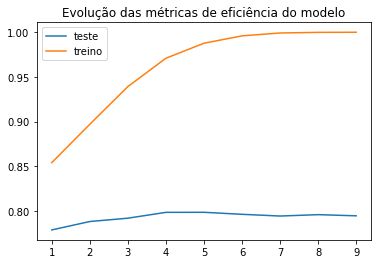

In [42]:
x = range(1, 10)
plt.plot(x, teste_lista)
plt.plot(x, treino_lista)
plt.title("Evolução das métricas de eficiência do modelo")
plt.legend(['teste', 'treino'])
plt.show()

# O random forest se comporta melhor com o over fit

In [43]:
modelo_arvore_aleatoria = RandomForestClassifier(max_depth=5, n_estimators=10)
roda_modelo_cv(modelo_arvore_aleatoria, dados_limpos, 5, 10)

AUC médio: 0.7599330924824345
Intervalo de confiança: de 0.6472199637655986 a 0.8726462211992703


In [44]:
modelo_arvore_aleatoria = RandomForestClassifier(max_depth=5, n_estimators=100) # padrão
roda_modelo_cv(modelo_arvore_aleatoria, dados_limpos, 5, 10)

AUC médio: 0.7985849066770119
Intervalo de confiança: de 0.7070780974604209 a 0.8900917158936028


In [45]:
modelo_arvore_aleatoria = RandomForestClassifier(max_depth=5, n_estimators=200)
roda_modelo_cv(modelo_arvore_aleatoria, dados_limpos, 5, 10)

AUC médio: 0.7931194501918185
Intervalo de confiança: de 0.6958828386489779 a 0.8903560617346591


In [46]:
modelo_arvore_aleatoria = RandomForestClassifier(max_depth=5, n_estimators=300)
roda_modelo_cv(modelo_arvore_aleatoria, dados_limpos, 5, 10)

AUC médio: 0.7968519790723739
Intervalo de confiança: de 0.7036268956595584 a 0.8900770624851895


In [47]:
#modelo_arvore_aleatoria = RandomForestClassifier(max_depth=5, n_estimators=500)
#roda_modelo_cv(modelo_arvore_aleatoria, dados_limpos, 5, 10)

### Podemos perceber que o melhor resultado com o menor processamento é o que tem n_estimators = 100

---

## Primeiramente, para ver a correlação devemos tirar os dados categóricos
### Inicialmente são os dados numéricos inteiros

In [48]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 352 entries, (0, 0) to (384, 1920)
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), int8(1), object(1)
memory usage: 656.0+ KB


In [49]:
dados_limpos.select_dtypes(exclude='float64')

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,
0,0,0,1,5,0,0-2,1
2,10,2,0,0,0,0-2,1
3,15,3,0,3,1,0-2,0
4,20,4,0,0,0,0-2,0
5,25,5,0,0,0,0-2,0
...,...,...,...,...,...,...,...
380,1900,380,0,3,1,0-2,1
381,1905,381,1,9,0,0-2,0
382,1910,382,0,4,0,0-2,1


### São as primeiras e ultimas colunas

In [50]:
dados_limpos.iloc[:,4:-2].corr()

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,...,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
DISEASE GROUPING 1,1.000000,0.196347,0.278271,0.017529,0.340370,0.202849,0.489245,0.176224,0.153793,-0.009174,...,0.129220,-0.028964,-0.041099,-0.056287,-0.050070,-0.054745,0.093512,-0.052568,-0.039692,-0.056984
DISEASE GROUPING 2,0.196347,1.000000,0.084392,0.114818,0.112878,-0.032173,0.118516,0.139947,0.068432,0.032245,...,0.014222,-0.001618,-0.024705,0.085122,0.070419,0.016917,0.005102,-0.003487,-0.024682,0.099019
DISEASE GROUPING 3,0.278271,0.084392,1.000000,0.308875,0.293259,0.275760,0.471039,0.075599,0.141903,-0.035719,...,-0.015035,-0.013900,0.000746,0.005011,-0.004373,0.020683,-0.011633,-0.008895,0.003183,0.006110
DISEASE GROUPING 4,0.017529,0.114818,0.308875,1.000000,0.128287,0.171438,0.136472,0.103100,0.063919,-0.049593,...,-0.023554,0.016131,0.032550,-0.026121,-0.043714,-0.029596,-0.034997,0.023616,0.034426,-0.025072
DISEASE GROUPING 5,0.340370,0.112878,0.293259,0.128287,1.000000,0.129836,0.459169,0.108849,0.149025,-0.082353,...,0.011404,-0.045482,-0.081749,-0.098081,-0.017232,-0.059434,-0.045113,-0.058564,-0.080693,-0.097014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BLOODPRESSURE_SISTOLIC_DIFF_REL,-0.054745,0.016917,0.020683,-0.029596,-0.059434,0.003571,-0.009490,-0.028020,0.040651,0.056603,...,0.371623,0.366943,0.425505,0.483904,0.779557,1.000000,0.418624,0.421228,0.422108,0.479010
HEART_RATE_DIFF_REL,0.093512,0.005102,-0.011633,-0.034997,-0.045113,0.018891,0.073639,-0.015522,0.064229,0.046781,...,0.949914,0.320962,0.362021,0.360456,0.373031,0.418624,1.000000,0.343703,0.364743,0.350001
RESPIRATORY_RATE_DIFF_REL,-0.052568,-0.003487,-0.008895,0.023616,-0.058564,-0.049022,-0.045665,0.019384,0.071270,0.029099,...,0.293907,0.961739,0.316620,0.349747,0.349866,0.421228,0.343703,1.000000,0.313204,0.342852
TEMPERATURE_DIFF_REL,-0.039692,-0.024682,0.003183,0.034426,-0.080693,0.005691,0.031264,0.008243,-0.018162,0.061337,...,0.298203,0.282514,0.999444,0.503937,0.356403,0.422108,0.364743,0.313204,1.000000,0.493818


In [51]:
alta_corr = 0.95
matrix_corr = dados_limpos.iloc[:,4:-2].corr().abs() # para deixar os numeros positivos
any(matrix_corr['DISEASE GROUPING 1'] > alta_corr) # existe em alguma linha uma alta correlação na coluna 1?

True

## O problema é que nessa matriz sempre terá uma correlação com ela mesmo

In [52]:
np.ones(matrix_corr.shape)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [53]:
np.ones(matrix_corr.shape).astype(bool)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [54]:
np.triu(np.ones(matrix_corr.shape))

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [55]:
np.triu(np.ones(matrix_corr.shape), k=1)

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(bool))

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,...,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
DISEASE GROUPING 1,NaN,0.196347,0.278271,0.017529,0.340370,0.202849,0.489245,0.176224,0.153793,0.009174,...,0.129220,0.028964,0.041099,0.056287,0.050070,0.054745,0.093512,0.052568,0.039692,0.056984
DISEASE GROUPING 2,NaN,NaN,0.084392,0.114818,0.112878,0.032173,0.118516,0.139947,0.068432,0.032245,...,0.014222,0.001618,0.024705,0.085122,0.070419,0.016917,0.005102,0.003487,0.024682,0.099019
DISEASE GROUPING 3,NaN,NaN,NaN,0.308875,0.293259,0.275760,0.471039,0.075599,0.141903,0.035719,...,0.015035,0.013900,0.000746,0.005011,0.004373,0.020683,0.011633,0.008895,0.003183,0.006110
DISEASE GROUPING 4,NaN,NaN,NaN,NaN,0.128287,0.171438,0.136472,0.103100,0.063919,0.049593,...,0.023554,0.016131,0.032550,0.026121,0.043714,0.029596,0.034997,0.023616,0.034426,0.025072
DISEASE GROUPING 5,NaN,NaN,NaN,NaN,NaN,0.129836,0.459169,0.108849,0.149025,0.082353,...,0.011404,0.045482,0.081749,0.098081,0.017232,0.059434,0.045113,0.058564,0.080693,0.097014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BLOODPRESSURE_SISTOLIC_DIFF_REL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.418624,0.421228,0.422108,0.479010
HEART_RATE_DIFF_REL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.343703,0.364743,0.350001
RESPIRATORY_RATE_DIFF_REL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313204,0.342852
TEMPERATURE_DIFF_REL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493818


In [57]:
alta_corr = 0.95

matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(bool))
excluir = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > alta_corr)]
excluir

['ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'ALBUMIN_MAX',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MIN',
 'BE_ARTERIAL_MAX',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BE_VENOUS_MAX',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MIN',
 'BIC_ARTERIAL_MAX',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MIN',
 'BIC_VENOUS_MAX',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'CALCIUM_MEAN',
 'CALCIUM_MIN',
 'CALCIUM_MAX',
 'CREATININ_MEAN',
 'CREATININ_MIN',
 'CREATININ_MAX',
 'FFA_MEAN',
 'FFA_MIN',
 'FFA_MAX',
 'GGT_MEAN',
 'GGT_MIN',
 'GGT_MAX',
 'GLUCOSE_MEAN',
 'GLUCOSE_MIN',
 'GLUCOSE_MAX',
 'HEMATOCRITE_MEAN',
 'HEMATOCRITE_MIN',
 'HEMATOCRITE_MAX',
 'HEMOGLOBIN_MEDIAN',
 'HEMOGLOBIN_MEAN',
 'HEMOGLOBIN_MIN',
 'HEMOGLOBIN_MAX',
 'INR_MEAN',
 'INR_MIN',
 'INR_MAX',
 'LACTATE_MEAN',
 'LACTATE_MIN',
 'LACTATE_MAX',
 'LEUKOCYTES_MEAN',
 'LEUKOCYTES_MIN',
 'LEUKOCYTES_MAX',
 'LINFOCITOS_MEAN',
 'LINFOCITOS_MIN',
 'LINFOCITOS_MAX',
 'NEUTROPHILES_MEDIAN',
 'NEUTROPHILES_MEA

## As colunas que se apresentam são aquelas que se referem ao mesmo dado, são manipulações (feature engineering)

In [58]:
def remove_corr_var(dados, valor_corte):
    matrix_corr = dados.iloc[:,4:-2].corr().abs()
    matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(bool))
    excluir = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > valor_corte)]
    
    return dados.drop(excluir, axis=1)

In [59]:
dados_limpos_sem_corr = remove_corr_var(dados_limpos, 0.95)
dados_limpos_sem_corr

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.247863,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.435897,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,0-2,1
3,15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.076923,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-0.956805,0-2,0
5,25,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.247863,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,-0.986481,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1900,380,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.418803,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
381,1905,381,1,9,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.589744,-1.000000,-1.000000,-1.000000,-1.000000,-0.619048,-1.000000,-1.000000,0-2,0
382,1910,382,0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1


In [60]:
dados_limpos_sem_corr = dados_limpos_sem_corr.reset_index(drop=True) # não foi feito na aula
dados_limpos_sem_corr

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,WINDOW,ICU
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.247863,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
1,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.435897,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,0-2,1
2,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
3,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.076923,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-0.956805,0-2,0
4,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.247863,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,-0.986481,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,380,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.418803,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
348,381,1,9,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.589744,-1.000000,-1.000000,-1.000000,-1.000000,-0.619048,-1.000000,-1.000000,0-2,0
349,382,0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
350,383,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.247863,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0


In [61]:
modelo_arvore_aleatoria = RandomForestClassifier(max_depth=5, n_estimators=100) # repetindo para poder comparar
roda_modelo_cv(modelo_arvore_aleatoria, dados_limpos, 5, 10)

AUC médio: 0.7985849066770119
Intervalo de confiança: de 0.7070780974604209 a 0.8900917158936028


In [62]:
modelo_arvore_aleatoria = RandomForestClassifier(max_depth=5, n_estimators=100)
roda_modelo_cv(modelo_arvore_aleatoria, dados_limpos_sem_corr, 5, 10)

AUC médio: 0.8029565525453684
Intervalo de confiança: de 0.7123960373873284 a 0.8935170677034083


## Percebemos que melhorou um pouco, mas reduz a possibilidade de overfit

---

# Piruação

In [63]:
from sklearn.neighbors import KNeighborsClassifier

classificador_vizinho = KNeighborsClassifier()

roda_modelo_cv(classificador_vizinho, dados_limpos_sem_corr, 5, 10)

AUC médio: 0.723533624832967
Intervalo de confiança: de 0.626454838610803 a 0.820612411055131


---

# Otimização de parâmetros - feature importance

In [64]:
from sklearn.model_selection import GridSearchCV

def roda_modelo_GridSearchCV(modelo, dados, n_splits, n_repeats, espaco_de_parametros):

    np.random.seed(1231234)
    dados = dados.sample(frac=1).reset_index(drop=True)
    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["PATIENT_VISIT_IDENTIFIER", 'ICU', 'WINDOW'], axis=1)
    


    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats=n_repeats)

    busca = GridSearchCV(modelo, param_grid=espaco_de_parametros,
                         cv = cv, scoring='roc_auc',
                         return_train_score=True)
    busca.fit(x, y)

    resultados = pd.DataFrame(busca.cv_results_)

    auc_medio = resultados.iloc[busca.best_index_]['mean_test_score']
    auc_medio_treino = resultados.iloc[busca.best_index_]['mean_train_score']

    auc_std = resultados.iloc[busca.best_index_]['std_test_score']

    print(f'AUC  {auc_medio} - {auc_medio_treino}')
    return auc_medio, auc_medio_treino    

In [65]:
espaco_de_parametros = {"max_depth" : [3, 5], "min_samples_split" : [32, 64, 128],
                            "min_samples_leaf" : [32, 64, 128], "criterion" : ["gini", "entropy"]}

roda_modelo_GridSearchCV(modelo_arvore_aleatoria, dados_limpos_sem_corr, 5, 10, espaco_de_parametros)

AUC  0.7992483108108109 - 0.8660691473967884


(0.7992483108108109, 0.8660691473967884)

---

Teste de parâmetros

In [70]:
np.random.seed(1231234)

dados_limpos_sem_corr = dados_limpos_sem_corr.sample(frac=1).reset_index(drop=True)
x_columns = dados_limpos_sem_corr.columns
y = dados_limpos_sem_corr["ICU"]
x = dados_limpos_sem_corr[x_columns].drop(["PATIENT_VISIT_IDENTIFIER", 'ICU', 'WINDOW'], axis=1)


espaco_de_parametros = {"max_depth" : [3, 5], "min_samples_split" : [32, 64, 128],
                            "min_samples_leaf" : [32, 64, 128], "criterion" : ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=10)

busca = GridSearchCV(modelo_arvore, param_grid=espaco_de_parametros,
                     cv = cv, scoring='roc_auc',
                     return_train_score=True)
busca.fit(x, y)

resultados = pd.DataFrame(busca.cv_results_)

auc_medio = resultados.iloc[busca.best_index_]['mean_test_score']
auc_medio_treino = resultados.iloc[busca.best_index_]['mean_train_score']

auc_std = resultados.iloc[busca.best_index_]['std_test_score']

In [79]:
busca.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=32,
                       min_samples_split=32)

In [66]:
from sklearn.model_selection import RandomizedSearchCV

def roda_modelo_RandomizedSearchCV(modelo, dados, n_splits, n_repeats, espaco_de_parametros, n_iter):

    np.random.seed(1231234)
    dados = dados.sample(frac=1).reset_index(drop=True)
    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["PATIENT_VISIT_IDENTIFIER", 'ICU', 'WINDOW'], axis=1)
    


    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats=n_repeats)

    busca = RandomizedSearchCV(modelo, param_distributions=espaco_de_parametros,
                                n_iter = n_iter, cv = cv, scoring='roc_auc',
                                return_train_score=True)
    busca.fit(x, y)

    resultados = pd.DataFrame(busca.cv_results_)

    auc_medio = resultados.iloc[busca.best_index_]['mean_test_score']
    auc_medio_treino = resultados.iloc[busca.best_index_]['mean_train_score']

    auc_std = resultados.iloc[busca.best_index_]['std_test_score']

    print(f'AUC  {auc_medio} - {auc_medio_treino}')
    return busca.best_estimator_

In [67]:
from scipy.stats import randint

espaco_de_parametros = {"n_estimators" :randint(10, 101), "max_depth" : randint(3, 6),
    "min_samples_split" : randint(32, 129), "min_samples_leaf" : randint(32, 129),
    "bootstrap" : [True, False], "criterion" : ["gini", "entropy"]}

roda_modelo_RandomizedSearchCV(modelo_arvore_aleatoria, dados_limpos_sem_corr, 5, 10, espaco_de_parametros, 5)

AUC  0.7870813531833268 - 0.8831110863346356


(0.7870813531833268, 0.8831110863346356)

---

# pipeline no sklearn